<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Modelo_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,555,18699,2021,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,472,14314,2021,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1082,19413,2021,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,678,20456,2021,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2594,25454,2021,5


In [3]:
#Creamos una copia del dataset original
Produccion_ypf_copia2 = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0


**Regresión Lineal**

In [4]:
# Eliminar columnas objetivo
columnas_modelo = Produccion_ypf.drop(columns=['Produccion de Petroleo', 'Produccion de Gas']).columns.tolist()

In [5]:
# Crear X y y para entrenamiento
x = Produccion_ypf[columnas_modelo]
y = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']]

In [6]:
x.head(10)

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,5.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,6.0
6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,7.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,8.0
8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,9.0
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,10.0


In [7]:
lista_atributos = x.columns

In [8]:
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [9]:
y.head()

,Produccion de Petroleo,Produccion de Gas
0,555.0,18699.0
1,472.0,14314.0
2,1082.0,19413.0
3,678.0,20456.0
4,2594.0,25454.0


In [10]:
x, y =np.array(x), np.array(y)

In [11]:
x

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        3.000e+00]])

In [12]:
y[:15]

array([[  555., 18699.],
       [  472., 14314.],
       [ 1082., 19413.],
       [  678., 20456.],
       [ 2594., 25454.],
       [ 3382., 34763.],
       [ 2267., 66193.],
       [ 2824., 72976.],
       [ 2671., 73914.],
       [ 1513., 73796.],
       [ 2069., 71993.],
       [ 2463., 76144.],
       [ 2461., 77355.],
       [ 2677., 72220.],
       [ 3435., 76838.]])

In [13]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [15]:
x.shape

(3246, 26)

In [16]:

X_train.shape

(2596, 26)

In [17]:

X_test.shape

(650, 26)

In [18]:

from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

**XGBoost**

In [19]:
from xgboost import XGBRegressor

In [20]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [21]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 3541.71227182425
RMSE: 7579.920128684703
R²: 0.9567754942439126


In [24]:
# Asegurarte que X tenga las columnas nuevas
X = Produccion_ypf_copia2[columnas_modelo]
y = Produccion_ypf_copia2[['Produccion de Petroleo', 'Produccion de Gas']]

# Ejemplo con XGBoost Regressor multisalida
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
best_model = MultiOutputRegressor(xgb_model)
best_model.fit(X, y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

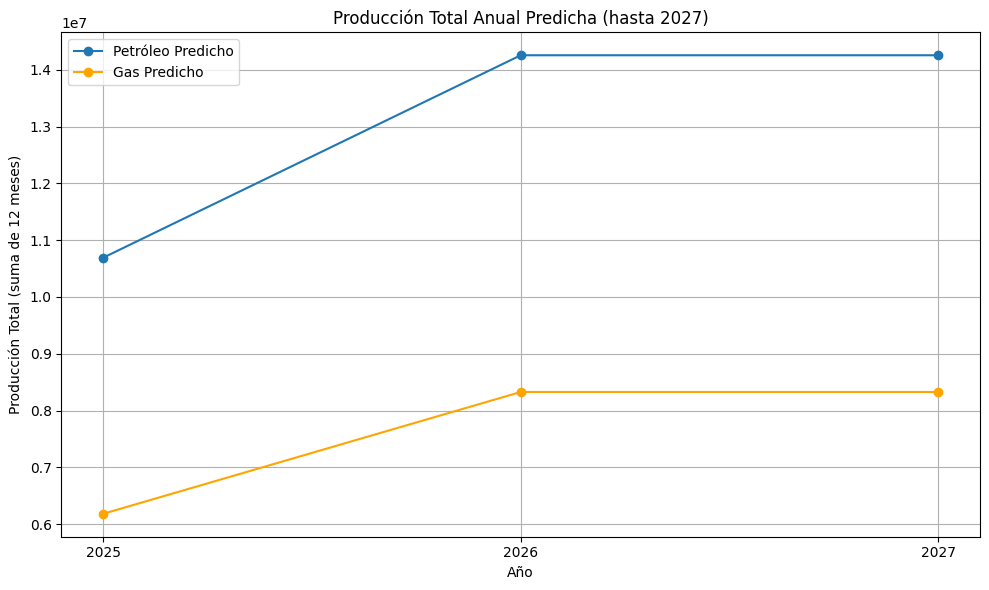

Predicción Anual Total de Producción:
    Año  Produccion de Petroleo Predicha  Produccion de Gas Predicha
0  2025                       10691245.0                   6184492.0
1  2026                       14253946.0                   8327990.0
2  2027                       14253946.0                   8327990.0


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Enriquecer el dataset original
Produccion_ypf['Meses_desde_inicio'] = (Produccion_ypf['Año'] - Produccion_ypf['Año'].min()) * 12 + (Produccion_ypf['Mes'] - 1)
Produccion_ypf['Mes_sin'] = np.sin(2 * np.pi * Produccion_ypf['Mes'] / 12)
Produccion_ypf['Mes_cos'] = np.cos(2 * np.pi * Produccion_ypf['Mes'] / 12)

# 2. Definir X e y
columnas_modelo = Produccion_ypf.drop(columns=['Produccion de Petroleo', 'Produccion de Gas'], errors='ignore').columns.tolist()
X = Produccion_ypf[columnas_modelo]
y = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']]

# 3. Guardar columnas exactas usadas en el entrenamiento
columnas_entrenamiento = columnas_modelo.copy()

# 4. Entrenar modelo (ejemplo: reemplazá con el tuyo si ya tenés uno entrenado)
from xgboost import XGBRegressor
best_model = XGBRegressor()
best_model.fit(X, y)

# 5. Último año y mes del dataset
ultimo_año = int(Produccion_ypf['Año'].max())
ultimo_mes = int(Produccion_ypf[Produccion_ypf['Año'] == ultimo_año]['Mes'].max())

# 6. Crear fechas desde el mes siguiente hasta diciembre 2027
fecha_inicio = pd.to_datetime(f'{ultimo_año}-{ultimo_mes:02d}-01') + pd.DateOffset(months=1)
fecha_fin = pd.to_datetime('2027-12-01')
fechas_futuras = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# 7. Tomar todas las filas del último mes como base
base_mes = Produccion_ypf[
    (Produccion_ypf['Año'] == ultimo_año) & (Produccion_ypf['Mes'] == ultimo_mes)
].drop(columns=['Produccion de Petroleo', 'Produccion de Gas'], errors='ignore')

# 8. Crear DataFrame con fechas futuras replicando todas las filas
filas_futuras = []
for fecha in fechas_futuras:
    copia_mes = base_mes.copy()
    copia_mes['Año'] = fecha.year
    copia_mes['Mes'] = fecha.month
    copia_mes['Meses_desde_inicio'] = (fecha.year - Produccion_ypf['Año'].min()) * 12 + (fecha.month - 1)
    copia_mes['Mes_sin'] = np.sin(2 * np.pi * fecha.month / 12)
    copia_mes['Mes_cos'] = np.cos(2 * np.pi * fecha.month / 12)
    filas_futuras.append(copia_mes)

future_df = pd.concat(filas_futuras, ignore_index=True)

# 9. Asegurar columnas correctas y orden
future_df = future_df[columnas_entrenamiento]

# 10. Predecir producción mes a mes
future_predictions = best_model.predict(future_df.values)
future_df['Produccion de Petroleo Predicha'] = future_predictions[:, 0]
future_df['Produccion de Gas Predicha'] = future_predictions[:, 1]

# 11. Agrupar por año (suma total de cada año)
prediccion_anual_futura = future_df.groupby('Año')[['Produccion de Petroleo Predicha', 'Produccion de Gas Predicha']].sum().reset_index()

# 12. Graficar
plt.figure(figsize=(10, 6))
plt.plot(prediccion_anual_futura['Año'], prediccion_anual_futura['Produccion de Petroleo Predicha'], marker='o', label='Petróleo Predicho')
plt.plot(prediccion_anual_futura['Año'], prediccion_anual_futura['Produccion de Gas Predicha'], marker='o', label='Gas Predicho', color='orange')
plt.title('Producción Total Anual Predicha (hasta 2027)')
plt.xlabel('Año')
plt.ylabel('Producción Total (suma de 12 meses)')
plt.xticks(prediccion_anual_futura['Año'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 13. Mostrar tabla
print("Predicción Anual Total de Producción:")
print(prediccion_anual_futura)

In [29]:
from prophet import Prophet

# Crear modelo Prophet
modelo_prophet = Prophet()

# Entrenar
modelo_prophet.fit(df_prophet)

# Crear fechas futuras hasta diciembre 2027
futuro = modelo_prophet.make_future_dataframe(periods=36, freq='MS')  # 3 años
forecast = modelo_prophet.predict(futuro)

# Visualizar
fig = modelo_prophet.plot(forecast)

# Agregar título y etiquetas a los ejes
ax = fig.gca()  # Obtener el eje actual
ax.set_title('Predicción de Producción de Petróleo con Prophet')
ax.set_xlabel('Fecha')
ax.set_ylabel('Producción (unidades)')

plt.show()

NameError: name 'df_prophet' is not defined

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Crear columna de fecha
df['fecha'] = pd.to_datetime({
    'year': df['Año'].astype(int),
    'month': df['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
serie = df['Produccion de Petroleo'].groupby(df.index).sum().asfreq('MS')
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Petróleo con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Petróleo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01']

NameError: name 'df' is not defined

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzv1zpyp/ziqhvv7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzv1zpyp/69r7kulw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95020', 'data', 'file=/tmp/tmpxzv1zpyp/ziqhvv7k.json', 'init=/tmp/tmpxzv1zpyp/69r7kulw.json', 'output', 'file=/tmp/tmpxzv1zpyp/prophet_modelsy9xkpqk/prophet_model-20250612210812.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


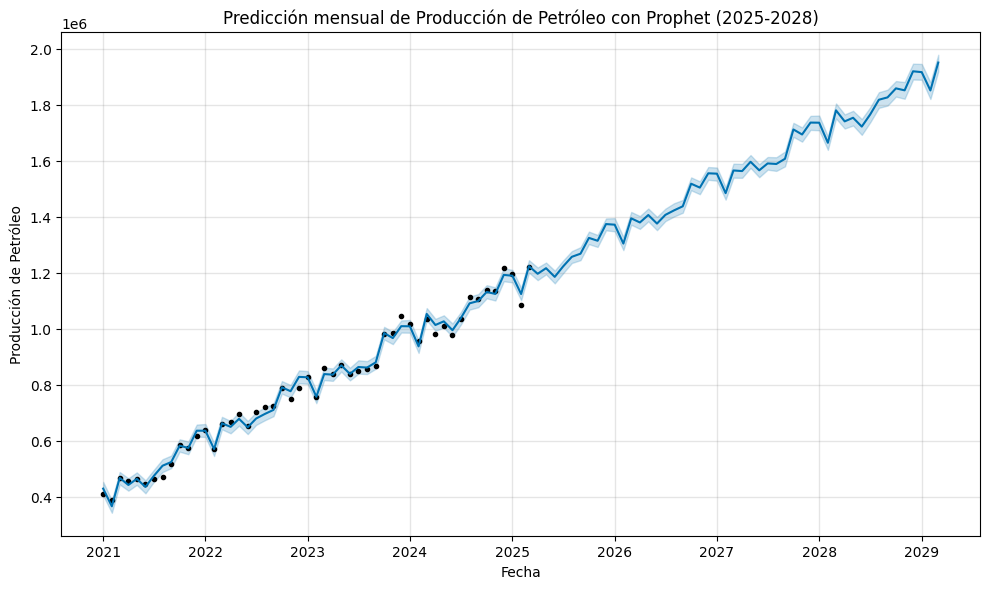

                    yhat
ds                      
2025-01-01  1.189236e+06
2025-02-01  1.123948e+06
2025-03-01  1.223452e+06
2025-04-01  1.196255e+06
2025-05-01  1.216120e+06
2025-06-01  1.185230e+06
2025-07-01  1.222537e+06
2025-08-01  1.256760e+06
2025-09-01  1.267907e+06
2025-10-01  1.324291e+06
2025-11-01  1.314070e+06
2025-12-01  1.373627e+06
2026-01-01  1.371446e+06
2026-02-01  1.304014e+06
2026-03-01  1.394110e+06
2026-04-01  1.379323e+06
2026-05-01  1.405928e+06
2026-06-01  1.375407e+06
2026-07-01  1.406502e+06
2026-08-01  1.422534e+06
2026-09-01  1.437054e+06
2026-10-01  1.517605e+06
2026-11-01  1.503722e+06
2026-12-01  1.554799e+06
2027-01-01  1.553497e+06
2027-02-01  1.483931e+06
2027-03-01  1.564892e+06
2027-04-01  1.562739e+06
2027-05-01  1.595854e+06
2027-06-01  1.565430e+06
2027-07-01  1.590027e+06
2027-08-01  1.588110e+06
2027-09-01  1.606612e+06
2027-10-01  1.711258e+06
2027-11-01  1.693299e+06
2027-12-01  1.735774e+06
2028-01-01  1.735390e+06
2028-02-01  1.663703e+06


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Crear columna de fecha
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
serie = Produccion_ypf.set_index('fecha')['Produccion de Petroleo'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Petróleo con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Petróleo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzv1zpyp/5kqn8ffa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxzv1zpyp/0xkbjvzx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10947', 'data', 'file=/tmp/tmpxzv1zpyp/5kqn8ffa.json', 'init=/tmp/tmpxzv1zpyp/0xkbjvzx.json', 'output', 'file=/tmp/tmpxzv1zpyp/prophet_modelq1j_ak5t/prophet_model-20250612210856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
21:08:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:08:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


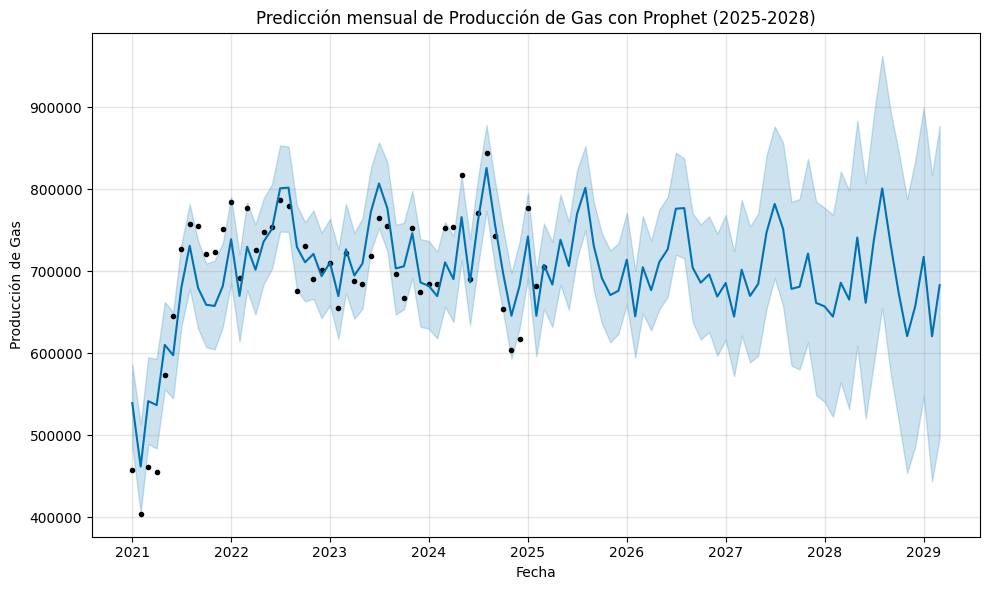

                     yhat
ds                       
2025-01-01  742565.158902
2025-02-01  645669.682135
2025-03-01  708038.116867
2025-04-01  683797.909989
2025-05-01  738528.032814
2025-06-01  706509.039951
2025-07-01  769844.002754
2025-08-01  801951.667169
2025-09-01  731045.050362
2025-10-01  691725.778460
2025-11-01  670988.475212
2025-12-01  676205.276220
2026-01-01  714186.924288
2026-02-01  645063.025569
2026-03-01  705027.628274
2026-04-01  676967.390924
2026-05-01  711327.479451
2026-06-01  726893.130282
2026-07-01  776407.668370
2026-08-01  777179.830790
2026-09-01  704638.298214
2026-10-01  686081.530750
2026-11-01  696283.884905
2026-12-01  669206.661784
2027-01-01  685722.536518
2027-02-01  644760.463026
2027-03-01  701928.472775
2027-04-01  669950.949065
2027-05-01  684552.884375
2027-06-01  747660.229563
2027-07-01  782281.477125
2027-08-01  751851.400578
2027-09-01  678536.651501
2027-10-01  681220.792792
2027-11-01  721619.409868
2027-12-01  661506.908819
2028-01-01  

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Crear columna de fecha
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
serie = Produccion_ypf.set_index('fecha')['Produccion de Gas'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Gas con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Gas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])